In [1]:
#alphavantage documentation available at:
#https://www.alphavantage.co/documentation/

%matplotlib inline
import stocks
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import csv
import time
import random


In [4]:
stocks.print_sectors()

Sector
Basic Industries          258
Capital Goods             366
Consumer Durables         132
Consumer Non-Durables     212
Consumer Services         788
Energy                    262
Finance                  1081
Health Care               877
Miscellaneous             148
Public Utilities          251
Technology                619
Transportation            114
Name: Symbol, dtype: int64


In [5]:
stocks.get_sector("Consumer Durables")

No data found.
A.O Smith Corporation (AOS)
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AOS&outputsize=full&apikey=CGL3TP0975MA8R2V
25155
ABB Ltd (ABB)
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ABB&outputsize=full&apikey=CGL3TP0975MA8R2V
23125
Acco Brands Corporation (ACCO)
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ACCO&outputsize=full&apikey=CGL3TP0975MA8R2V
17650
Acuity Brands, Inc. (AYI)
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AYI&outputsize=full&apikey=CGL3TP0975MA8R2V
22315
Amcor plc (AMCR)
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMCR&outputsize=full&apikey=CGL3TP0975MA8R2V
9160
AMTEK, Inc. (AME)
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AME&outputsize=full&apikey=CGL3TP0975MA8R2V
25155
Aphria Inc. (APHA)
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=APHA&outputsize=full&apikey=CGL3TP0975MA8R2V
5595
Appli

In [3]:
dat = stocks.read_sector("Energy")
dat.head()

Found data on 250 companies.


,date,AR,type,APA,ARCH,AT,BHGE,BAS,BTE,BBL,...,SNDE,TELL,TRCH,TPIC,TGA,USEG,VTNR,WPRT,WWD,ZN
0,2019-08-23,3.26,close,20.69,72.53,2.35,20.88,1.37,1.23,40.84,...,1.130,7.50,1.37,17.28,1.35,0.47,1.18,2.65,103.13,0.32
1,2019-08-22,3.34,close,21.46,75.08,2.37,21.43,1.47,1.30,41.34,...,1.150,9.19,1.34,18.18,1.43,0.49,1.20,2.80,105.93,0.32
2,2019-08-21,3.47,close,21.73,77.87,2.37,21.24,1.49,1.32,41.53,...,1.150,8.28,1.32,18.30,1.44,0.48,1.17,2.89,105.47,0.33
3,2019-08-20,3.60,close,21.75,76.81,2.34,21.11,1.51,1.35,41.97,...,1.159,7.55,1.37,18.19,1.42,0.44,1.25,2.74,104.97,0.34
4,2019-08-19,3.75,close,21.90,77.95,2.35,21.42,1.54,1.37,42.96,...,1.150,7.03,1.40,17.50,1.45,0.43,1.19,2.82,106.42,0.34


In [12]:
x = [col for col in dat.columns if (col != 'date' and col != 'type' and col != 'GNK')]
x = x[0:10]

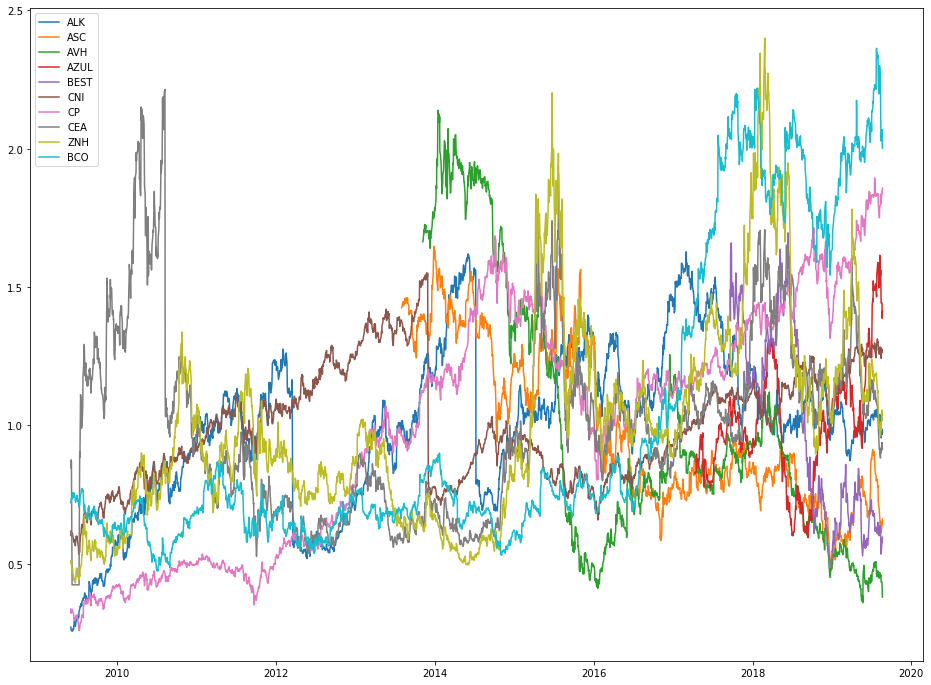

In [13]:
plt.figure(figsize=(16,12))
stocks.plot(dat.loc[dat['date'] > '2009-06',:], symbols=x, type='high', normalize=True)
plt.legend()

In [14]:
x = list(completed_companies.groupby('Sector').get_group('Transportation')['Symbol'])

In [11]:
reader = csv.reader("Data/Commodities.csv")

In [12]:
header = next(reader)
header[0]

'D'

In [10]:
next(reader)

['m']

In [13]:
commodities="PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,PALLMETA,PMETA,PPMETA,PEXGMETA,PFERT,PNRG,POILAPSP,PNGAS,PCOAL,PALUM,PBANSOP,PBARL,PBEEF,PCOALAU,PCOALSA_USD,PCOCO,PCOFFOTM,PCOFFROB,PROIL,PCOPP,PCOTTIND,PFSHMEAL,PGNUTS,PHIDE,PIORECR,PLAMB,PLEAD,PLOGORE,PLOGSK,PMAIZMT,PNGASEU,PNGASJP,PNGASUS,PNICK,POILAPSP,POILBRE,POILDUB,POILWTI,POLVOIL,PORANG,PPOIL,PPORK,PPOULT,PRICENPQ,PRUBB,PSALM,PSAWMAL,PSAWORE,PSHRI,PSMEA,PSOIL,PSOYB,PSUGAISA,PSUGAUSA,PSUNO,PTEA,PTIN,PURAN,PWHEAMT,POATS,PSORG,PWOOLC,PWOOLF,PZINC,PLMMODY,PCOBA,PGOLD,PSILVER,PPALLA,PPLAT,PPROPANE,PUREA,PPOTASH,PDAP,PTOMATO,PMILK,PCHANA,PAPPLE".split(",")

In [15]:
isindex = [True]*18 + [False]*(len(commodities)-18)

In [19]:
isindex[18]
commodities[18]

'PALUM'

In [23]:
temp = ["All Commodity Price Index, 2016 = 100, includes both Fuel and Non-Fuel Price Indices",
        "Commodities for Index: All, excluding Gold, 2016 = 100",
        "Non-Fuel Price Index, 2016 = 100, includes Precious Metal, Food and Beverages and Industrial Inputs Price Indices",
        "Food and Beverage Price Index, 2016 = 100, includes Food and Beverage Price Indices",
        "Food Price Index, 2016 = 100, includes Cereal, Vegetable Oils, Meat, Seafood, Sugar, and Other Food (Apple (non-citrus fruit), Bananas, Chana (legumes), Fishmeal, Groundnuts, Milk (dairy), Tomato (veg)) Price Indices",
        "Beverage Price Index, 2016 = 100, includes Coffee, Tea, and Cocoa",
        "Industrial Inputs Price Index, 2016 = 100, includes Agricultural Raw Materials and Base Metals Price Indices",
        "Agriculture Price Index, 2016 = 100, includes Food and Beverages and Agriculture Raw Materials Price Indices",
        "Agricultural Raw Materials Index, 2016 = 100, includes Timber, Cotton, Wool, Rubber, and Hides Price Indices",
        "All Metals Index, 2016 = 100: includes Metal Price Index (Base Metals) and Precious Metals Index",
        "Base Metals Price Index, 2016 = 100, includes Aluminum, Cobalt, Copper, Iron Ore, Lead, Molybdenum, Nickel, Tin, Uranium and Zinc Price Indices",
        "Precious Metals Price Index, 2016 = 100, includes Gold, Silver, Palladium and Platinum Price Indices",
        "All Metals EX GOLD Index, 2016 = 100: includes Metal Price Index (Base Metals) and ONLY Silver, Palladium, Platinum ",
        "Fertilizer Index, 2016 = 100, includes DAP, Potash, UREA",
        "Fuel (Energy) Index, 2016 = 100, includes Crude oil (petroleum), Natural Gas, Coal Price and Propane Indices",
        "Crude Oil (petroleum), Price index, 2016 = 100, simple average of three spot prices; Dated Brent, West Texas Intermediate, and the Dubai Fateh",
        "Natural Gas Price Index, 2016 = 100, includes European, Japanese, and American Natural Gas Price Indices",
        "Coal Price Index, 2016 = 100, includes Australian and South African Coal",
        "Aluminum, 99.5% minimum purity, LME spot price, CIF UK ports, US$ per metric ton",
        "Bananas, Central American and Ecuador, FOB U.S. Ports, US$ per metric ton",
        "Barley, Canadian no.1 Western Barley, spot price, US$ per metric ton",
        "Beef, Australian and New Zealand 85% lean fores, CIF U.S. import price, US cents per pound",
        "Coal, Australian thermal coal, 12,000- btu/pound, less than 1% sulfur, 14% ash, FOB Newcastle/Port Kembla, US$ per metric ton",
        "Coal, South African export price, US$ per metric ton",
        "Cocoa beans, International Cocoa Organization cash price, CIF US and European ports, US$ per metric ton",
        "Coffee, Other Mild Arabicas, International Coffee Organization New York cash price, ex-dock New York, US cents per pound",
        "Coffee, Robusta, International Coffee Organization New York cash price, ex-dock New York, US cents per pound",
        "Rapeseed oil, crude, fob Rotterdam, US$ per metric ton",
        "Copper, grade A cathode, LME spot price, CIF European ports, US$ per metric ton",
        "Cotton, Cotton Outlook 'A Index', Middling 1-3/32 inch staple, CIF Liverpool, US cents per pound",
        "Fishmeal, Peru Fish meal/pellets 65% protein, CIF, US$ per metric ton",
        "Groundnuts (peanuts), 40/50 (40 to 50 count per ounce), cif Argentina, US$ per metric ton",
        "Hides, Heavy native steers, over 53 pounds, wholesale dealer's price, US, Chicago, fob Shipping Point, US cents per pound",
        "China import Iron Ore Fines 62% FE spot (CFR Tianjin port), US dollars per metric ton",
        "Lamb, frozen carcass Smithfield London, US cents per pound",
        "Lead, 99.97% pure, LME spot price, CIF European Ports, US$ per metric ton",
        "Soft Logs, Average Export price from the U.S. for Douglas Fir, US$ per cubic meter",
        "Hard Logs, Best quality Malaysian meranti, import price Japan, US$ per cubic meter",
        "Maize (corn), U.S. No.2 Yellow, FOB Gulf of Mexico, U.S. price, US$ per metric ton",
        "Natural Gas, Russian Natural Gas border price in Germany, US$ per Million Metric British Thermal Unit",
        "Natural Gas, Indonesian Liquefied Natural Gas in Japan, US$ per Million Metric British Thermal Unit",
        "Natural Gas, Natural Gas spot price at the Henry Hub terminal in Louisiana, US$ per Million Metric British Thermal Unit",
        "Nickel, melting grade, LME spot price, CIF European ports, US$ per metric ton",
        "Crude Oil (petroleum), Price index, 2016 = 100, simple average of three spot prices; Dated Brent, West Texas Intermediate, and the Dubai Fateh",
        "Crude Oil (petroleum),  Dated Brent, light blend 38 API, fob U.K., US$ per barrel",
        "Crude Oil (petroleum), Dubai Fateh Fateh 32 API, US$ per barrel",
        "Crude Oil (petroleum), West Texas Intermediate 40 API, Midland Texas, US$ per barrel",
        "Olive Oil, extra virgin less than 1% free fatty acid, ex-tanker price U.K., US$ per metric ton",
        "Generic 1st 'JO' Future, USD/lb",
        "Palm oil, Malaysia Palm Oil Futures (first contract forward) 4-5 percent FFA, US$ per metric ton",
        "Swine (pork), 51-52% lean Hogs, U.S. price, US cents per pound.",
        "Poultry (chicken), Whole bird spot price, Ready-to-cook, whole, iced, Georgia docks, US cents per pound",
        "Rice, 5 percent broken milled white rice, Thailand nominal price quote, US$ per metric ton",
        "Rubber, Singapore Commodity Exchange, No. 3 Rubber Smoked Sheets, 1st contract, US cents per pound",
        "Fish (salmon), Farm Bred Norwegian Salmon, export price, US$ per kilogram",
        "Hard Sawnwood, Dark Red Meranti, select and better quality, C&F U.K port, US$ per cubic meter",
        "Soft Sawnwood, average export price of Douglas Fir, U.S. Price, US$ per cubic meter",
        "Thailand Whiteleg Shrimp 70 Shrimps/Kg Spot Price",
        "Soybean Meal, Chicago Soybean Meal Futures (first contract forward) Minimum 48 percent protein, US$ per metric ton",
        "Soybean Oil, Chicago Soybean Oil Futures (first contract forward) exchange approved grades, US$ per metric ton","Soybeans, U.S. soybeans, Chicago Soybean futures contract (first contract forward) No. 2 yellow and par, US$ per metric ton",
        "Sugar, Free Market, Coffee Sugar and Cocoa Exchange (CSCE) contract no.11 nearest future position, US cents per pound",
        "Sugar, U.S. import price, contract no.14 nearest futures position, US cents per pound (Footnote: No. 14 revised to No. 16)",
        "Sunflower oil, Sunflower Oil, US export price from Gulf of Mexico, US$ per metric ton",
        "Tea, Mombasa, Kenya, Auction Price, US cents per kilogram, From July 1998,Kenya auctions, Best Pekoe Fannings. Prior, London auctions, c.i.f. U.K. warehouses",
        "Tin, standard grade, LME spot price, US$ per metric ton",
        "Uranium, NUEXCO, Restricted Price, Nuexco exchange spot, US$ per pound",
        "Wheat, No.1 Hard Red Winter, ordinary protein, Kansas City, US$ per metric ton",
        "Generic 1st 'O ' Future, USD/bushel",
        "Sorghum; U.S., Number 2 yellow, fob Gulf of Mexico, US cents per pound",
        "Wool, coarse, 23 micron, Australian Wool Exchange spot quote, US cents per kilogram",
        "Wool, fine, 19 micron, Australian Wool Exchange spot quote, US cents per kilogram",
        "Zinc, high grade 98% pure, US$ per metric ton",
        "Molybdenum, 57 to 63% purity contained in roasted molybdenum concentrate, LME spot price, USD/ton",
        "Cobalt, U.S. cathodes, spot",
        "Gold, Fixing Committee of the London Bullion Market Association, London 3 PM fixed price, US$ per troy ounce",
        "Silver, London Bullion Market Association, USD/troy ounce",
        "Palladium, LME spot price, USD/ troy ounce",
        "Platinum, LME spot price, USD/troy ounce",
        "North American Spot LPG Propane Price/Mont Belvieu LST",
        "US Gulf NOLA Urea Granular Spot Price, USD/ST",
        "Potassium Chloride (Muriate of Potash) Standard Grade: FOB Vancouver Spot Price, USD/metric tonne","US Gulf NOLA DAP Export Spot Price per MT, USD/metric tonne","Monthly average consumer prices in metropolitan France - Tomatoes (1 Kg), EUR","USDA Class 3 (formerly known as Basic Formula) Milk Spot Price, USD/cwt","MCX India Chana Spot, INR/100 Kgs","Monthly average consumer prices in metropolitan France - Apples (1 Kg), EUR"]

In [24]:
len(temp)

87

In [25]:
len(commodities)

87

In [26]:
len(isindex)

87

In [29]:
com_df = pd.DataFrame([commodities, temp, isindex])

In [34]:
com_df = com_df.rename(columns={0:'Commodity', 1:'Description', 2:'is_index'})

In [36]:
com_df = com_df.set_index("Commodity")

com_df

In [38]:
com_df.to_csv("Res/commodities_desc.csv")

In [39]:
df = pd.read_csv("Data/Commodities.csv")
df.head()

,Commodity,PALLFNF,PEXGALL,PNFUEL,PFANDB,PFOOD,PBEVE,PINDU,PAGRI,PRAWM,...,PPALLA,PPLAT,PPROPANE,PUREA,PPOTASH,PDAP,PTOMATO,PMILK,PCHANA,PAPPLE
0,1980M1,NaN,NaN,NaN,NaN,NaN,124.374,NaN,NaN,69.466,...,NaN,806.79,NaN,150.00,100.0,261.32,NaN,NaN,NaN,NaN
1,1980M2,NaN,NaN,NaN,NaN,NaN,124.357,NaN,NaN,72.604,...,NaN,882.32,NaN,160.71,115.0,258.10,NaN,NaN,NaN,NaN
2,1980M3,NaN,NaN,NaN,NaN,NaN,129.212,NaN,NaN,68.529,...,NaN,746.54,NaN,165.00,115.0,259.86,NaN,NaN,NaN,NaN
3,1980M4,NaN,NaN,NaN,NaN,NaN,124.304,NaN,NaN,67.094,...,NaN,589.06,NaN,169.09,112.5,248.09,NaN,NaN,NaN,NaN
4,1980M5,NaN,NaN,NaN,NaN,NaN,127.143,NaN,NaN,66.928,...,NaN,559.65,NaN,170.00,117.5,211.36,NaN,NaN,NaN,NaN


In [ ]:
df = df.rename(columns={'Commo'})